In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Задание 2.5
1 point possible (graded)
Решается задача бинарной классификации с помощью логистической регрессии.

Задано уравнение разделяющей плоскости:

z=1+5x1−0.3x2 

На вход алгоритма подаётся новое наблюдение с признаками  x1=0.3  и  x2=3 . Определите вероятность принадлежности наблюдения к классу 1. Ответ округлите до двух знаков после точки-разделителя.

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x1 = 0.3
x2 = 3
z = 1 + 5 * x1 - 0.3 * x2
probability = sigmoid(z)
print(f"Вероятность принадлежности к классу 1: {probability:.2f}")



Вероятность принадлежности к классу 1: 0.83


### Задание 2.9
1 point possible (graded)
Для выполнения задания скачайте набор данных.

Таблица состоит из четырёх столбцов:

SNo — номер строки (данный столбец вам не понадобится, вы можете сразу его удалить);
X_1 и X_2 — факторы;
y — целевой признак.
Обучите модель логистической регрессии для предсказания целевого признака y. В качестве алгоритма оптимизации используйте стохастический градиентный спуск (масштабировать данные не нужно). В качестве значения параметра random_state возьмите число 42, остальные параметры оставьте по умолчанию.

Воспользуйтесь функцией plot_probabilities_2d(), которую мы объявили ранее. Постройте визуализацию разделяющей поверхности.

Сколько объектов класса 0 будут неверно отнесены моделью к классу 1?

Ответ: 6

In [6]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказывает вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линия, где вероятность равна 0.5.
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

,X_1,X_2,y
0,-0.869144,0.389310,0.0
1,-0.993467,-0.610591,0.0
2,-0.834064,0.239236,0.0
3,-0.136471,0.632003,1.0
4,0.403887,0.310784,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_1     100 non-null    float64
 1   X_2     100 non-null    float64
 2   y       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


None

w0: [0.55528115]
w1, w2: [[2.81003262 2.5877695 ]]


Text(120.72222222222221, 0.5, 'y true')

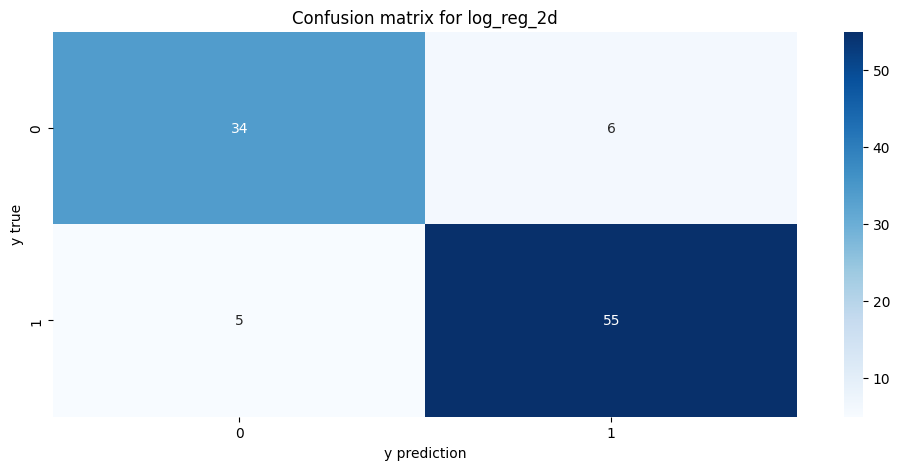

In [13]:
#task_data = pd.read_csv('data/task_data.zip')
task_data = pd.read_csv('data/task_data.zip').drop('SNo', axis=1)
#task_data.drop(columns='SNo')
display(task_data.head())
display(task_data.info())


from sklearn import linear_model 

#Создаём матрицу наблюдений X и столбец с ответами y
X = task_data[['X_1', 'X_2']]
y = task_data['y']

#Создаём объект класса LogisticRegression
log_reg = linear_model.LogisticRegression(random_state=42)
#Обучаем модель, минизируя logloss
log_reg.fit(X, y)
#Выводим результирующие коэффициенты
print('w0: {}'.format(log_reg.intercept_)) #свободный член w0
print('w1, w2: {}'.format(log_reg.coef_)) #остальные параметры модели w1, w2, ..., wm

#Делаем предсказание моделью, обученной на всех признаках 
y_pred = log_reg.predict(task_data.drop('y', axis=1))

from sklearn import metrics #метрики

# Строим матрицы ошибок для каждой из моделей
confusion_matrix1 = metrics.confusion_matrix(y, y_pred)

# Визуализируем матрицы ошибок
fig, axes = plt.subplots(1, 1, figsize=(12, 5))  # исправлено plot на subplots

# Строим тепловую карту для матрицы ошибок
sns.heatmap(confusion_matrix1, annot=True, fmt='', ax=axes, cmap='Blues')  # убрали [0], так как один график

# Добавляем название графику и подписи осей
axes.set_title('Confusion matrix for log_reg_2d')  # убрали [0]
axes.set_xlabel('y prediction')  # убрали [0]
axes.set_ylabel('y true')  # убрали [0]


In [17]:
# Выводим матрицу ошибок
print("Матрица ошибок:")
print(confusion_matrix1)

# Получаем количество неверно классифицированных объектов класса 0
false_positives = confusion_matrix1[0,1]
print(f"\nКоличество объектов класса 0, неверно отнесенных к классу 1: {false_positives}")

Матрица ошибок:
[[34  6]
 [ 5 55]]

Количество объектов класса 0, неверно отнесенных к классу 1: 6


In [15]:
#Модель log_reg_2d:
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred)))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred)))

Accuracy: 0.89
Precision: 0.90
Recall: 0.92
F1 score: 0.91


In [16]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86        40
         1.0       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



### Задание 3.1
1 point possible (graded)
Вы создали классификатор, который разделяет экономические и политические новости на два разных Telegram-канала, и хотите проверить его качество. За день вышло 15 политических новостей и 20 экономических.

Ваш алгоритм из 15 политических новостей отметил 9 как экономические, а из 20 экономических 6 — как политические.

Найдите метрику accuracy. Ответ округлите до сотых.


1) Сначала составим матрицу ошибок:
Всего 15 политических (класс 1) и 20 экономических (класс 0) новостей
Из 15 политических: 6 правильно (TP), 9 неправильно (FN)
Из 20 экономических: 14 правильно (TN), 6 неправильно (FP)

In [18]:
# Матрица ошибок:
#               Предсказано
#               Эк.  Пол.
# Реальные Эк.  14    6    = 20
#          Пол.  9     6    = 15
#               = 23   = 12  = 35

# Accuracy = (Правильно предсказанные) / (Общее количество)
# Accuracy = (TN + TP) / (TN + TP + FN + FP)
# Accuracy = (14 + 6) / (14 + 6 + 9 + 6)
# Accuracy = 20 / 35 = 0.5714...

accuracy = (14 + 6) / (14 + 6 + 9 + 6)
print(f"Accuracy: {accuracy:.2f}")  # 0.57

Accuracy: 0.57


### Задание 3.6
1 point possible (graded)
У вас есть истинные ответы y_true = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы y_pred = [0, 1, 0, 0, 1, 1, 0, 1].

Вычислите значение метрики precision.

Ответ округлите до сотых.

Пример ввода ответа: 0.12


Precision: 0.75

In [19]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

print('Precision: {:.2f}'.format(metrics.precision_score(y_true, y_pred)))

Precision: 0.75


### Задание 3.7
1 point possible (graded)
У вас есть истинные ответы y_true = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы y_pred = [0, 1, 0, 0, 1, 1, 0, 1].

Вычислите значение метрики recall.

Ответ округлите до сотых.

Пример ввода ответа: 0.12

Recall: 0.60

In [20]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1] 
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_true, y_pred)))

Recall: 0.60


### Задание 3.8
1 point possible (graded)
У вас есть истинные ответы y_true = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы y_pred = [0, 1, 0, 0, 1, 1, 0, 1].

Вычислите значение метрики  F1 .

Ответ округлите до сотых.

Пример ввода ответа: 0.12

F1: 0.67

In [21]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1] 
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

#Рассчитываем F1
print('F1: {:.2f}'.format(metrics.f1_score(y_true, y_pred))) 

F1: 0.67
